In [36]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# - !wget https://mirror.jframeworks.com/apache/spark/spark-3.0.3/spark-3.0.3-bin-hadoop2.7.tgz
!wget https://dlcdn.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
#    https://spark.apache.org/downloads.html -> click on Download Spark: spark-3.5.4-bin-hadoop3.tgz
!tar xvf spark-3.5.5-bin-hadoop3.tgz
!pip install -q findspark
!pip install pyspark==3.5.5
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "spark-3.5.5-bin-hadoop3"
#- Run the followings:

--2025-03-07 18:11:09--  https://dlcdn.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400724056 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.5-bin-hadoop3.tgz.1’

spark-3.5.5-bin-had 100%[===================>] 382.16M  43.7MB/s    in 5.2s    

2025-03-07 18:11:14 (72.8 MB/s) - ‘spark-3.5.5-bin-hadoop3.tgz.1’ saved [400724056/400724056]

spark-3.5.5-bin-hadoop3/
spark-3.5.5-bin-hadoop3/jars/
spark-3.5.5-bin-hadoop3/jars/HikariCP-2.5.1.jar
spark-3.5.5-bin-hadoop3/jars/JLargeArrays-1.5.jar
spark-3.5.5-bin-hadoop3/jars/JTransforms-3.1.jar
spark-3.5.5-bin-hadoop3/jars/RoaringBitmap-0.9.45.jar
spark-3.5.5-bin-hadoop3/jars/ST4-4.0.4.jar
spark-3.5.5-bin-hadoop3/jars/activation-1.1.1.jar
spark-3.5.5-bin-hadoop3/jars/aircompressor-0.27.jar
spark-3.5.5-bin-hadoop3/jars

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("HousingPriceRegressionEDA").getOrCreate()

In [39]:
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","
file_type = "csv"

df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter).csv("/content/drive/MyDrive/HousingPriceRegression/Data/kc_house_data.csv")

In [40]:
df.show(5)

+----------+---------------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|        id|           date| price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|    lat|    long|sqft_living15|sqft_lot15|
+----------+---------------+------+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+-------+--------+-------------+----------+
|7129300520|20141013T000000|221900|       3|        1|       1180|    5650|     1|         0|   0|        3|    7|      1180|            0|    1955|           0|  98178|47.5112|-122.257|         1340|      5650|
|6414100192|20141209T000000|538000|       3|     2.25|       2570|    7242|     2|         0|   0|        3|    7|      2170|          400|    1951|    

## Missing values for each column

In [41]:
from pyspark.sql.functions import col, sum

df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()


+---+----+-----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+---+----+-------------+----------+
| id|date|price|bedrooms|bathrooms|sqft_living|sqft_lot|floors|waterfront|view|condition|grade|sqft_above|sqft_basement|yr_built|yr_renovated|zipcode|lat|long|sqft_living15|sqft_lot15|
+---+----+-----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+---+----+-------------+----------+
|  0|   0|    0|       0|        0|          0|       0|     0|         0|   0|        0|    0|         0|            0|       0|           0|      0|  0|   0|            0|         0|
+---+----+-----+--------+---------+-----------+--------+------+----------+----+---------+-----+----------+-------------+--------+------------+-------+---+----+-------------+----------+



no missing values

In [42]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- price: string (nullable = true)
 |-- bedrooms: string (nullable = true)
 |-- bathrooms: string (nullable = true)
 |-- sqft_living: string (nullable = true)
 |-- sqft_lot: string (nullable = true)
 |-- floors: string (nullable = true)
 |-- waterfront: string (nullable = true)
 |-- view: string (nullable = true)
 |-- condition: string (nullable = true)
 |-- grade: string (nullable = true)
 |-- sqft_above: string (nullable = true)
 |-- sqft_basement: string (nullable = true)
 |-- yr_built: string (nullable = true)
 |-- yr_renovated: string (nullable = true)
 |-- zipcode: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- sqft_living15: string (nullable = true)
 |-- sqft_lot15: string (nullable = true)



In [43]:
for col in df.columns:
  df.select(col).distinct().show()

+----------+
|        id|
+----------+
|3542300060|
|1105000588|
|6189200125|
|0726049331|
|5104540240|
|7376300060|
|9158100116|
|4309720160|
|3410600335|
|6159400030|
|6788200800|
|6744700181|
|6300000693|
|3629910370|
|5706500140|
|5016002180|
|2331300025|
|1115400090|
|7225000090|
|5358300100|
+----------+
only showing top 20 rows

+---------------+
|           date|
+---------------+
|20140527T000000|
|20150314T000000|
|20150209T000000|
|20141008T000000|
|20140817T000000|
|20150408T000000|
|20140715T000000|
|20150324T000000|
|20150527T000000|
|20140910T000000|
|20150301T000000|
|20141119T000000|
|20140813T000000|
|20150309T000000|
|20140902T000000|
|20150224T000000|
|20140602T000000|
|20140608T000000|
|20150402T000000|
|20150218T000000|
+---------------+
only showing top 20 rows

+-----------+
|      price|
+-----------+
|     389999|
|     404000|
|     521000|
|     447000|
|     825000|
|  1.23e+006|
|     459500|
|     721000|
|     768500|
|     998160|
|     392800|
|     48

## convert data types

In [44]:
from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType, DateType

# Define the type conversions
columns_to_int = ["bedrooms", "floors", "view", "condition", "grade", "yr_built", "yr_renovated", "zipcode", "waterfront"]
columns_to_double = ["price", "bathrooms", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement",
                     "lat", "long", "sqft_living15", "sqft_lot15"]
columns_to_date = ["date"]

# Apply the type conversions
for col_name in columns_to_int:
    df = df.withColumn(col_name, col(col_name).cast(IntegerType()))

for col_name in columns_to_double:
    df = df.withColumn(col_name, col(col_name).cast(DoubleType()))

for col_name in columns_to_date:
    df = df.withColumn(col_name, col(col_name).cast(DateType()))

# Print schema to verify changes
df.printSchema()


root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- price: double (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: double (nullable = true)
 |-- sqft_lot: double (nullable = true)
 |-- floors: integer (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: double (nullable = true)
 |-- sqft_basement: double (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: double (nullable = true)
 |-- sqft_lot15: double (nullable = true)



## Histogram for Numerical Columns

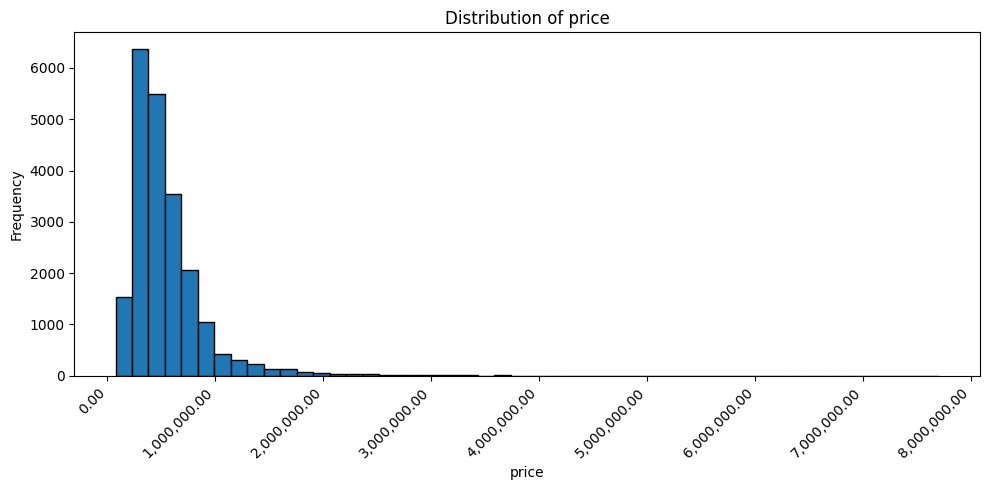

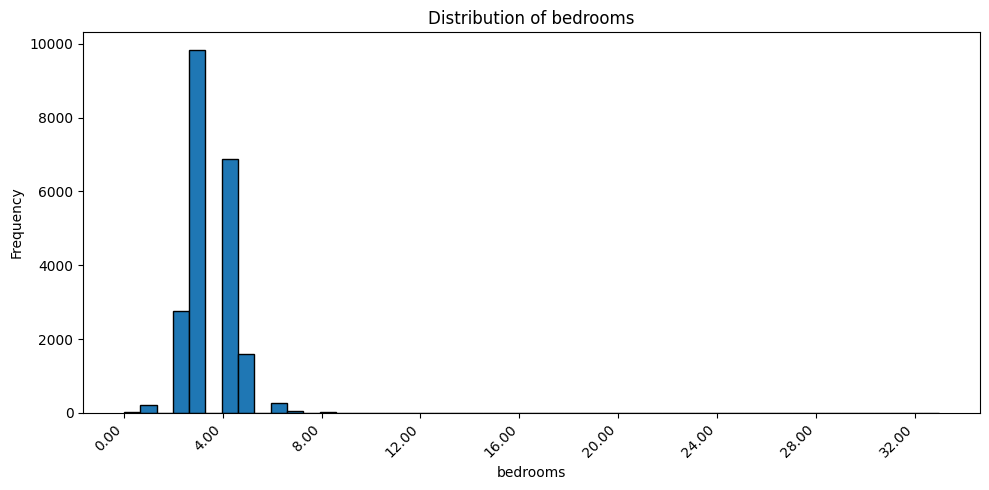

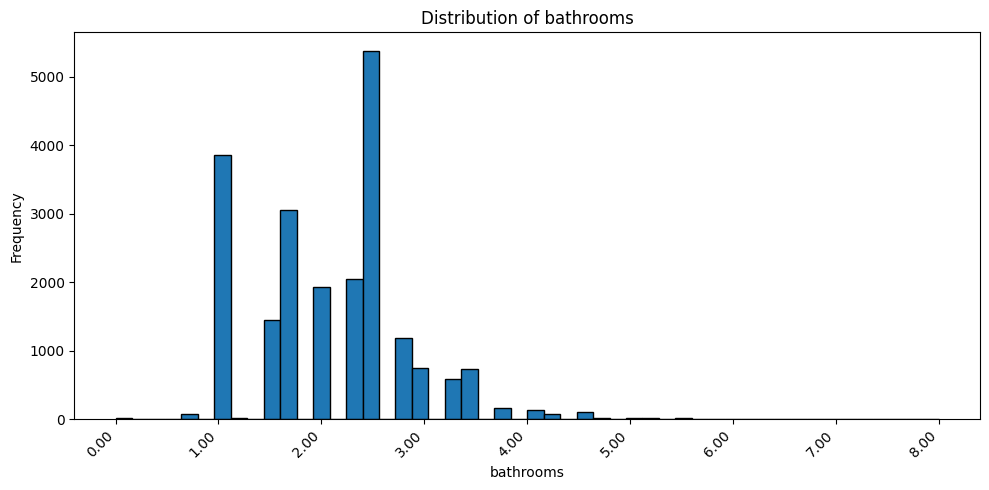

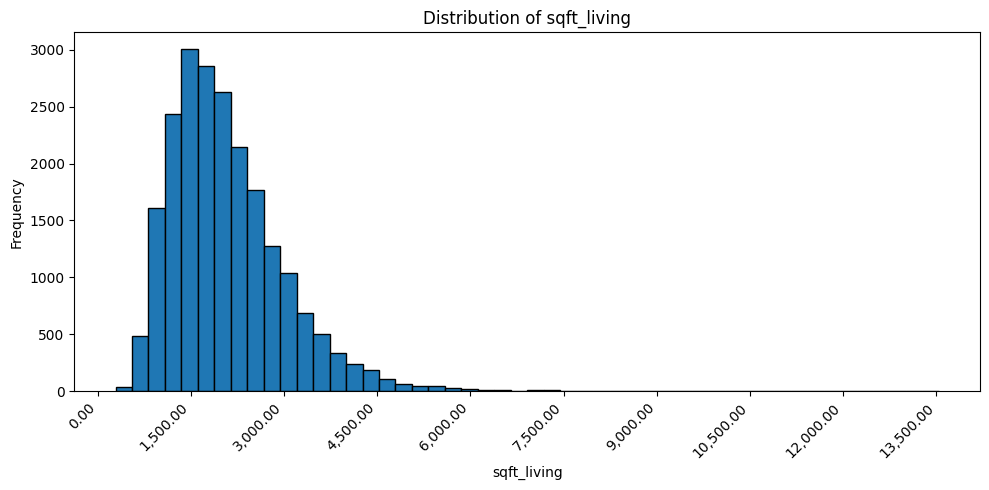

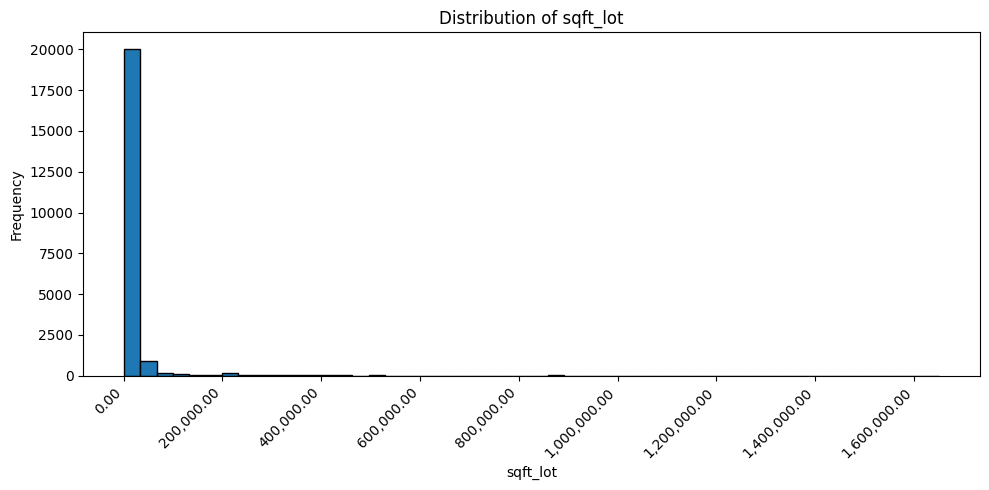

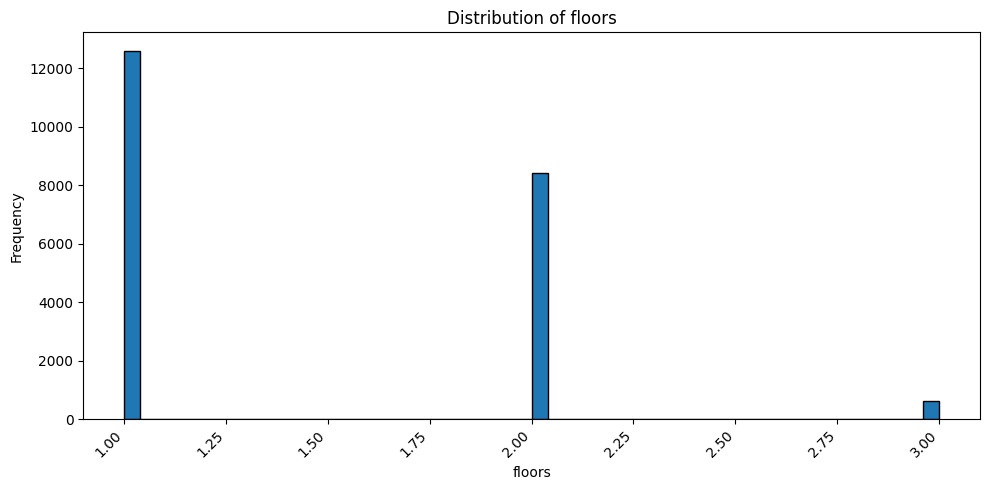

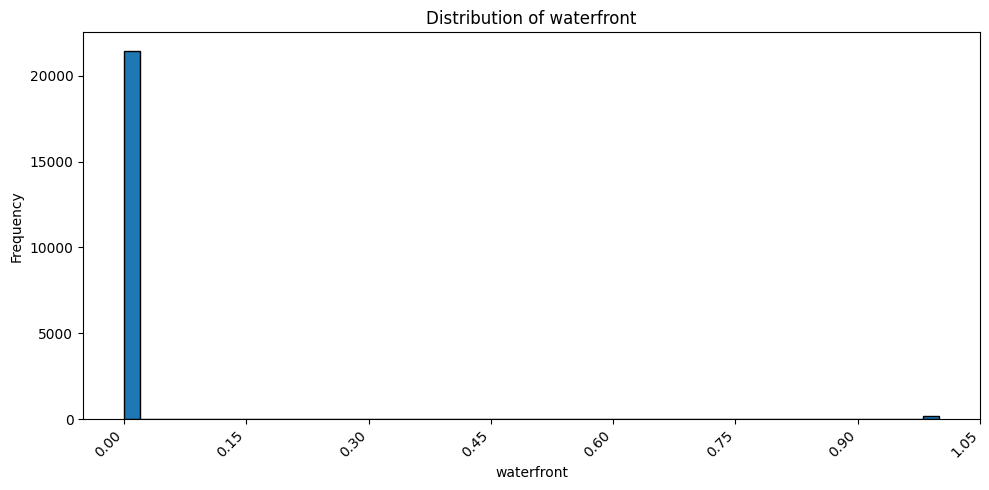

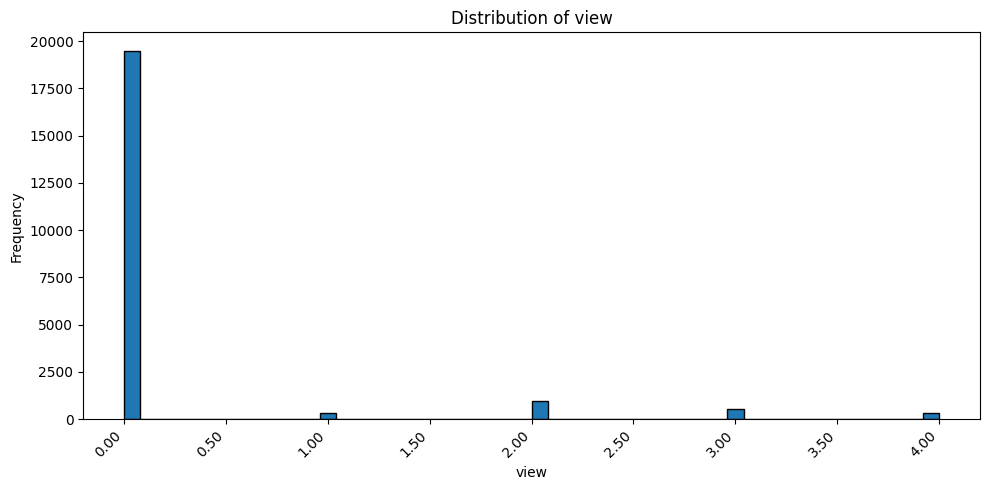

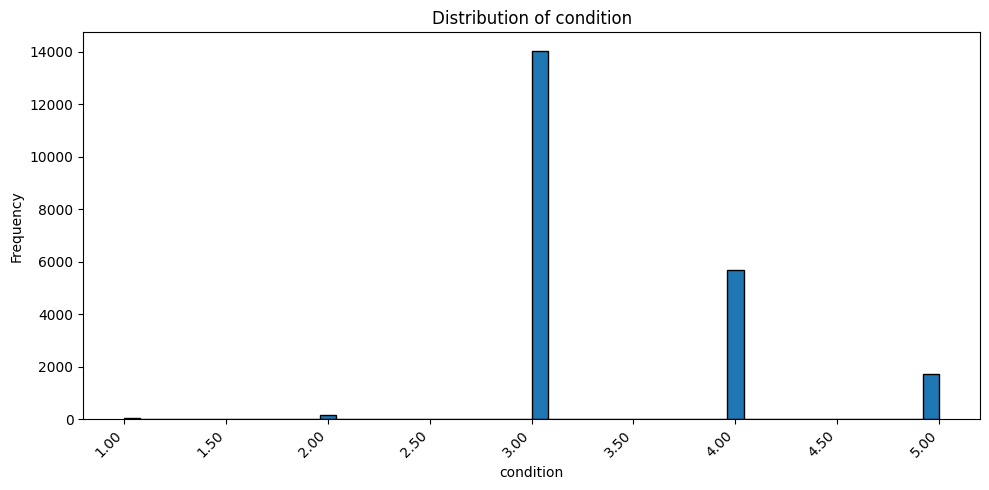

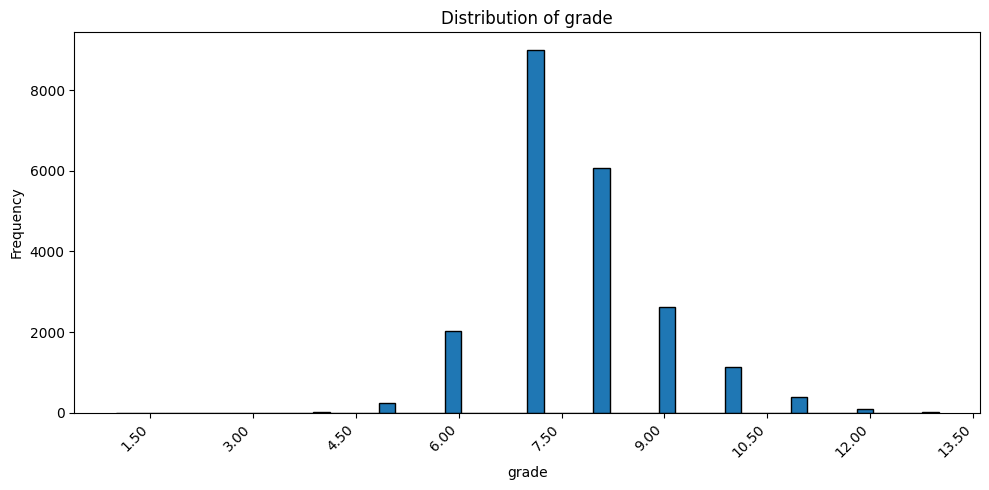

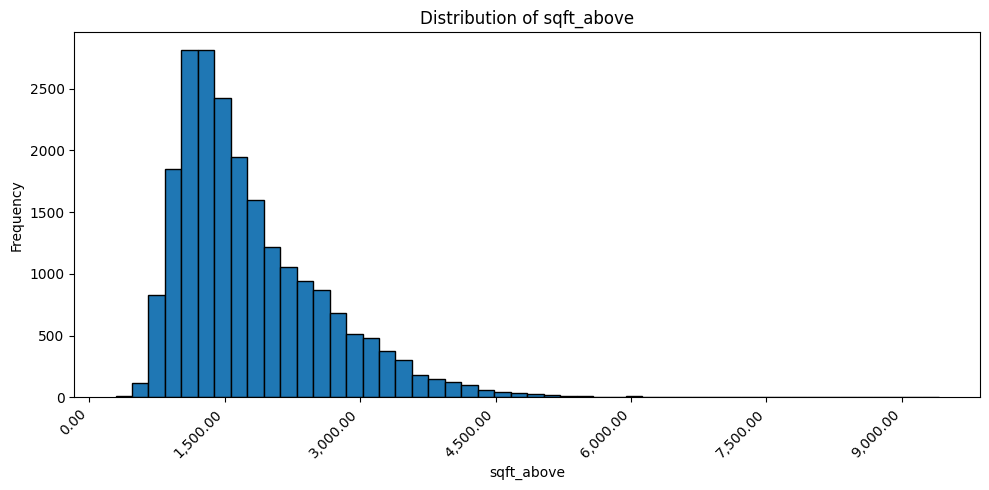

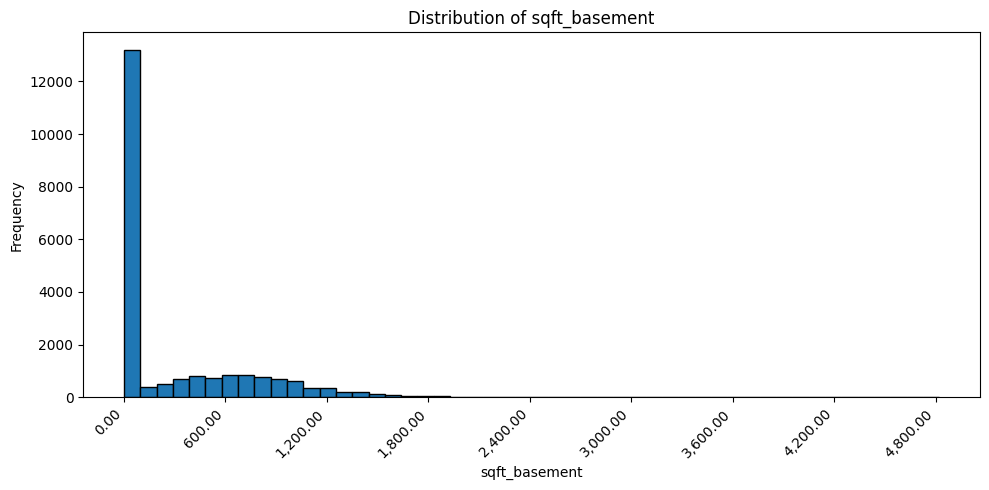

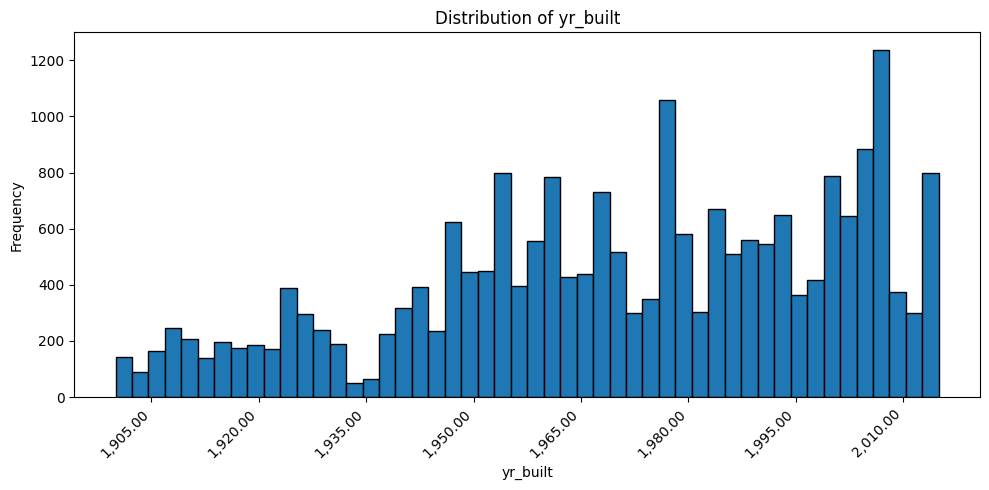

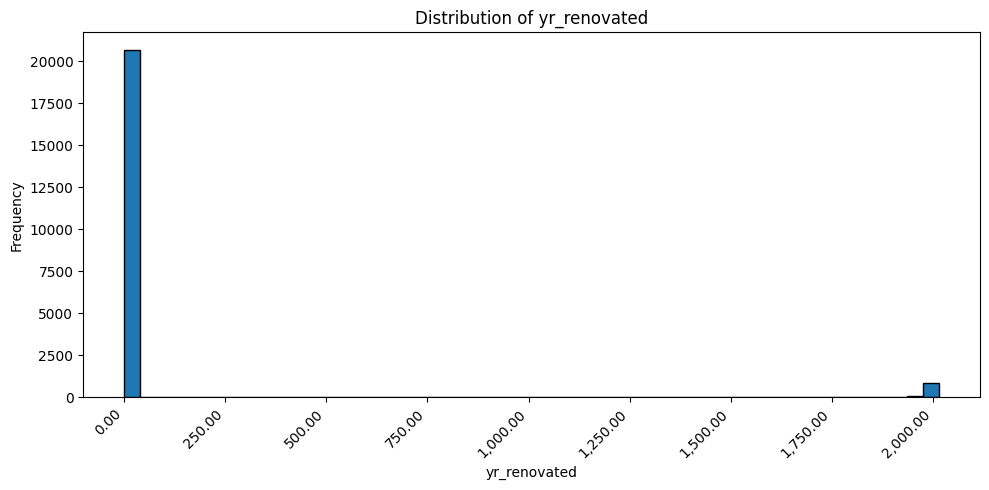

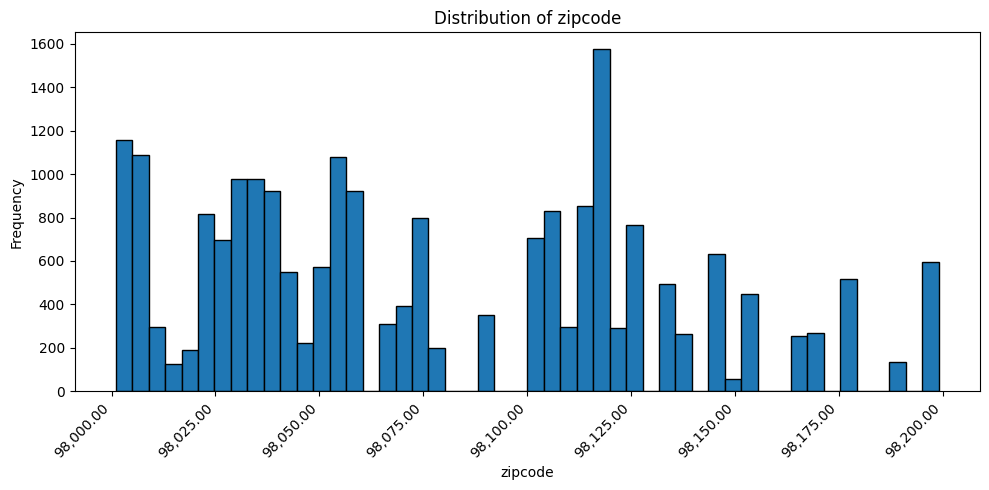

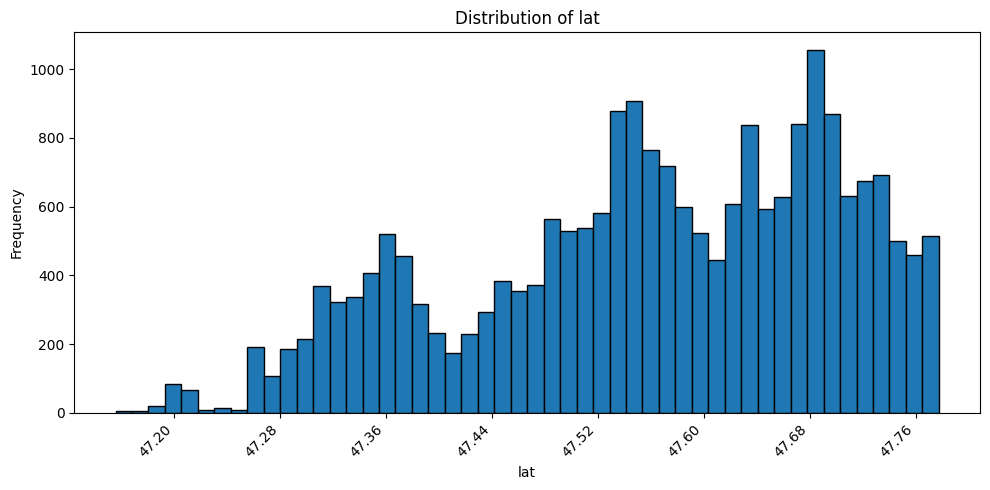

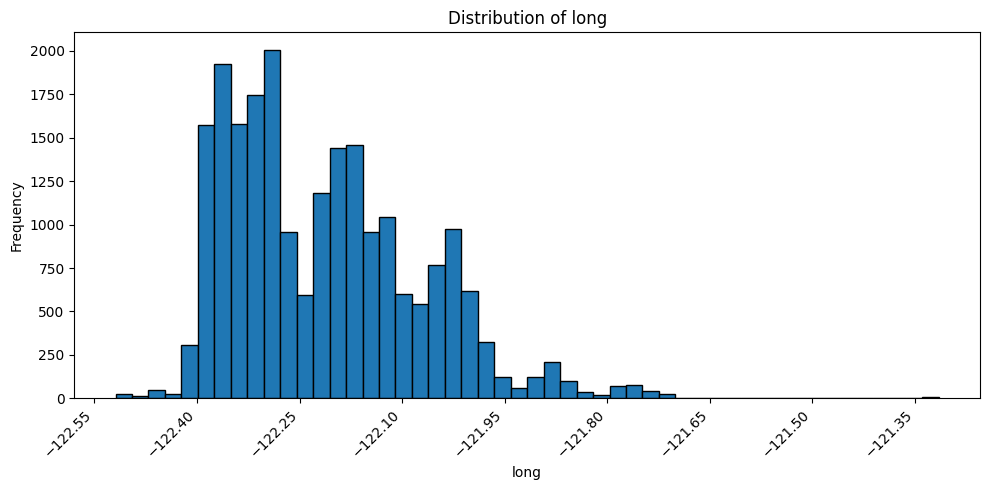

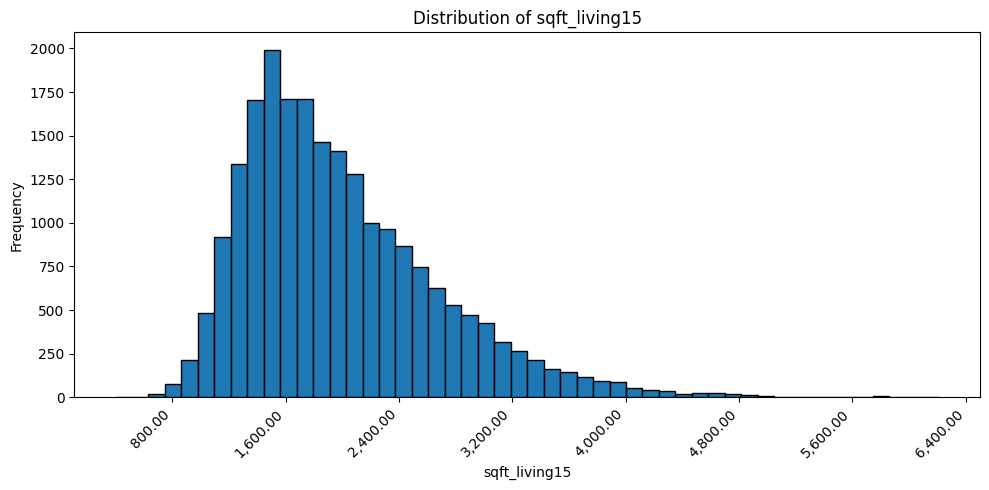

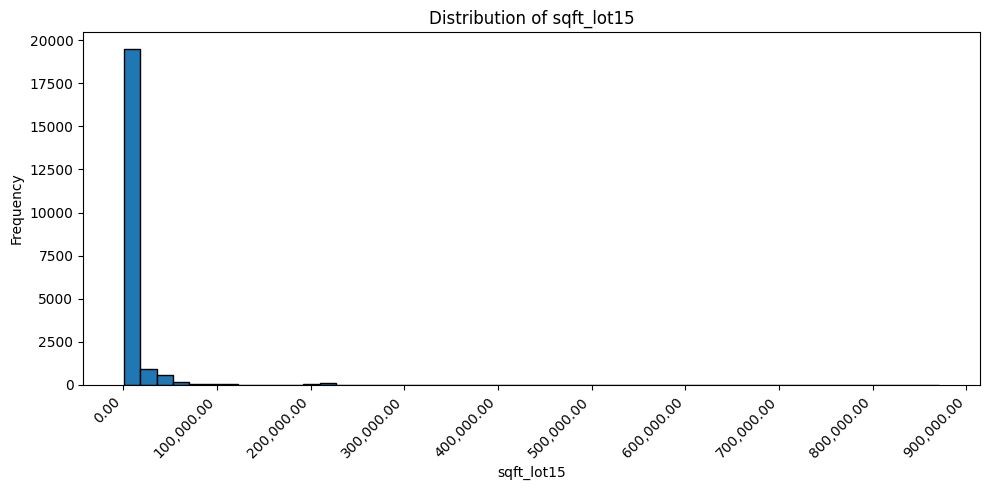

In [45]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from pyspark.sql.types import NumericType

numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]

df_pandas = df.select(numeric_cols).toPandas()

for column in numeric_cols:
    plt.figure(figsize=(10, 5))

    plt.hist(df_pandas[column], bins=50, edgecolor='black')

    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()


`price` highliy skewed with outliers

`bedrooms` has massive outliers -- skewed right

`sqft_living` has outliers

`sqft_lot` has massive outliers

`waterfront` has a ton of values of `0` -- will be encoded

`view` has a ton of values of `0`

outliers for `sqft_above` -- skewed right

massive outliers for `sqft_basement` -- also holds a ton of values of `0`

`yr_built` skewed left

`yr_renovated` has a ton of values of `0` with a few values around `2000`

`sqft_lot15` has extreme outliers

## Outlier Detection

In [46]:
df.describe().show()

+-------+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+
|summary|                  id|             price|         bedrooms|         bathrooms|       sqft_living|          sqft_lot|            floors|          waterfront|               view|         condition|             grade|        sqft_above|     sqft_basement|          yr_built|      yr_renovated|           zipcode|                lat|               long|    sqft_living15|        sqft_lot15|
+-------+--------------------+------------------+-----------------+------------------+------------------+------------------+------------------+--------------------+-------------------+------------------+-------

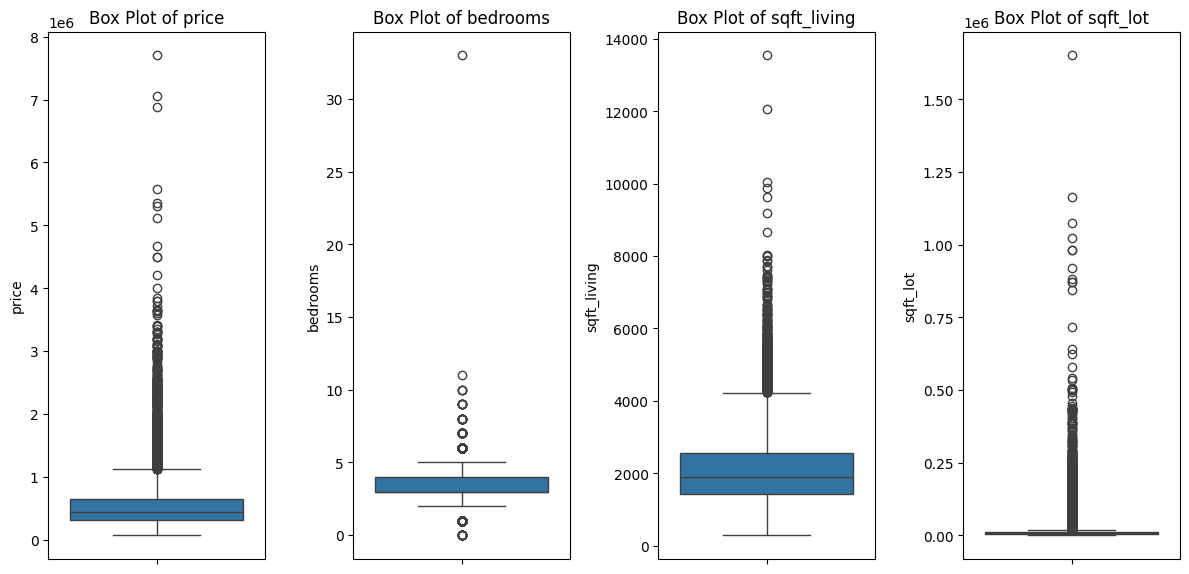

In [47]:
df_pandas = df.select(["price", "bedrooms", "sqft_living", "sqft_lot"]).toPandas()

plt.figure(figsize=(12, 6))

features = ["price", "bedrooms", "sqft_living", "sqft_lot"]

for i, feature in enumerate(features, 1):
    plt.subplot(1, len(features), i)
    sns.boxplot(y=df_pandas[feature])
    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


In [48]:
from pyspark.sql.types import StructType, StructField, StringType


numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]

total_rows = df.count()

outlier_percentages = []
for col_name in numeric_cols:
    q1, q3 = df.approxQuantile(col_name, [0.25, 0.75], 0)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outlier_count = df.filter((col(col_name) < lower_bound) | (col(col_name) > upper_bound)).count()

    outlier_percentage = (outlier_count / total_rows) * 100
    outlier_percentages.append((col_name, outlier_count, outlier_percentage))

schema = StructType([
    StructField("Feature", StringType(), True),
    StructField("Outlier Count", IntegerType(), True),
    StructField("Outlier Percentage", DoubleType(), True)
])

outlier_df = spark.createDataFrame(outlier_percentages, schema)

outlier_df.show(truncate=False)


+-------------+-------------+--------------------+
|Feature      |Outlier Count|Outlier Percentage  |
+-------------+-------------+--------------------+
|price        |1146         |5.302364317771711   |
|bedrooms     |546          |2.526257345116365   |
|bathrooms    |571          |2.6419284689770044  |
|sqft_living  |572          |2.6465553139314304  |
|sqft_lot     |2425         |11.220099014482026  |
|floors       |0            |0.0                 |
|waterfront   |163          |0.7541757275713691  |
|view         |2124         |9.827418683199927   |
|condition    |30           |0.13880534863276733 |
|grade        |1911         |8.841900707907278   |
|sqft_above   |611          |2.8270022671540276  |
|sqft_basement|496          |2.2949150973950863  |
|yr_built     |0            |0.0                 |
|yr_renovated |914          |4.228936288344977   |
|zipcode      |0            |0.0                 |
|lat          |2            |0.009253689908851155|
|long         |256          |1.

`sqft_lot`, `sqft_lot15`, `view`, and `grade` have significant percentages of outliers

options for outliers:

- remove from dataset
- winsorization
  - cap prices at 99th percentile
    - helpful for features like `sqft_living` that are important predictors
- apply log transformation

Plan:

- Price (target variable)
  - Do not remove outliers
  - Log transformation to normalize distribution
  - maybe do winsorization or log transformation
- Bedrooms and Bathrooms
  - Winsorization to cap extreme values
  - Do not remove unless values are unrealistic
  - Maybe make a bed / bath ratio
- Square Footage Living:
  - Log transformation to reduce skewness
- Square Footage Lot:
  - Apply log transformation to reduce skew
  - Cap extreme values at 99th percentile
- Waterfront to be encoded
- View:
  - Keep as ordinal feature
- Square Footage Above:
  - Apply log transformation to reduce skew
  - Cap extreme values at 99th percentile
- Square Footage Basement:
  - Log transform for non-zero values
  - Cap extreme values at 99th percentile
- Year Built:
  - to be converted to house age
- Year Renovated:
  - To be convered to years since rennovation
- Square Footage Living and Lot 2015
  - Apply log transformation
  - Cap extreme values at 99th percentile


## Transformations

### Price

In [49]:
from pyspark.sql.functions import log1p

df = df.withColumn("log_price", log1p(col("price")))

df = df.drop("price")

df = df.withColumnRenamed("log_price", "price")

df.printSchema()
df.select("price").show(10)


root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bedrooms: integer (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: double (nullable = true)
 |-- sqft_lot: double (nullable = true)
 |-- floors: integer (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: double (nullable = true)
 |-- sqft_basement: double (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: double (nullable = true)
 |-- sqft_lot15: double (nullable = true)
 |-- price: double (nullable = true)

+------------------+
|             price|
+------------------+
|12.309986615445005|
|13.195615697878253|
|12.100717685412471|
|13.311331132544721|
|  13.1

### Bedrooms and Bathrooms Winsorization

In [50]:
from pyspark.sql.functions import when, col

bedroom_99 = df.approxQuantile("bedrooms", [0.99], 0)[0]
bathroom_99 = df.approxQuantile("bathrooms", [0.99], 0)[0]

df = df.withColumn("bedrooms", when(col("bedrooms") > bedroom_99, bedroom_99).otherwise(col("bedrooms")))
df = df.withColumn("bathrooms", when(col("bathrooms") > bathroom_99, bathroom_99).otherwise(col("bathrooms")))

df.select("bedrooms", "bathrooms").show(10)


+--------+---------+
|bedrooms|bathrooms|
+--------+---------+
|     3.0|      1.0|
|     3.0|     2.25|
|     2.0|      1.0|
|     4.0|      3.0|
|     3.0|      2.0|
|     4.0|     4.25|
|     3.0|     2.25|
|     3.0|      1.5|
|     3.0|      1.0|
|     3.0|      2.5|
+--------+---------+
only showing top 10 rows



In [51]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: double (nullable = true)
 |-- sqft_lot: double (nullable = true)
 |-- floors: integer (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: double (nullable = true)
 |-- sqft_basement: double (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: double (nullable = true)
 |-- sqft_lot15: double (nullable = true)
 |-- price: double (nullable = true)



### Square Footage Living, Lot, Above, and Basement Winsorization and Log

In [52]:
from pyspark.sql.functions import log1p, col, when

sqft_living_99 = df.approxQuantile("sqft_living", [0.99], 0)[0]
sqft_lot_99 = df.approxQuantile("sqft_lot", [0.99], 0)[0]
sqft_basement_99 = df.approxQuantile("sqft_basement", [0.99], 0)[0]
sqft_above_99 = df.approxQuantile("sqft_above", [0.99], 0)[0]


df = df.withColumn("sqft_living", when(col("sqft_living") > sqft_living_99, sqft_living_99).otherwise(col("sqft_living")))
df = df.withColumn("sqft_lot", when(col("sqft_lot") > sqft_lot_99, sqft_lot_99).otherwise(col("sqft_lot")))
df = df.withColumn("sqft_basement", when(col("sqft_basement") > sqft_basement_99, sqft_basement_99).otherwise(col("sqft_basement")))
df = df.withColumn("sqft_above", when(col("sqft_above") > sqft_above_99, sqft_above_99).otherwise(col("sqft_above")))

df = df.withColumn("sqft_living", log1p(col("sqft_living")))
df = df.withColumn("sqft_lot", log1p(col("sqft_lot")))
df = df.withColumn("sqft_basement", log1p(col("sqft_basement")))
df = df.withColumn("sqft_above", log1p(col("sqft_above")))

df.printSchema()
df.select("sqft_living", "sqft_lot", "sqft_basement", "sqft_above").show(10)


root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: double (nullable = true)
 |-- sqft_lot: double (nullable = true)
 |-- floors: integer (nullable = true)
 |-- waterfront: integer (nullable = true)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: double (nullable = true)
 |-- sqft_basement: double (nullable = true)
 |-- yr_built: integer (nullable = true)
 |-- yr_renovated: integer (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: double (nullable = true)
 |-- sqft_lot15: double (nullable = true)
 |-- price: double (nullable = true)

+-----------------+------------------+-----------------+-----------------+
|      sqft_living|          sqft_lot|    sqft_basement|       sqft_above|
+----

Remove 0s for `sqft_basement`

In [53]:
df = df.withColumn("sqft_basement", when(col("sqft_basement") == 0, None).otherwise(col("sqft_basement")))

df.select("sqft_basement").show(10)


+-----------------+
|    sqft_basement|
+-----------------+
|             NULL|
|5.993961427306569|
|             NULL|
|6.814542897259958|
|             NULL|
|7.333676395657684|
|             NULL|
|             NULL|
|6.594413459749778|
|             NULL|
+-----------------+
only showing top 10 rows



### Encode Waterfront

In [54]:
df = df.withColumn("waterfront", when(col("waterfront") > 0, 1).otherwise(0))

df.select("waterfront").distinct().show()


+----------+
|waterfront|
+----------+
|         1|
|         0|
+----------+



### Convert `yr_built` to `house_age` and `yr_renovated` to `years_since_renovation`

In [55]:
from pyspark.sql.functions import col, when

CURRENT_YEAR = 2025

df = df.withColumn("house_age", CURRENT_YEAR - col("yr_built"))

df = df.withColumn("years_since_renovation",
                   when(col("yr_renovated") == 0, None)  # If no renovation, set as NULL
                   .otherwise(CURRENT_YEAR - col("yr_renovated")))

df = df.drop("yr_built", "yr_renovated")

df.select("house_age", "years_since_renovation").show(10)


+---------+----------------------+
|house_age|years_since_renovation|
+---------+----------------------+
|       70|                  NULL|
|       74|                    34|
|       92|                  NULL|
|       60|                  NULL|
|       38|                  NULL|
|       24|                  NULL|
|       30|                  NULL|
|       62|                  NULL|
|       65|                  NULL|
|       22|                  NULL|
+---------+----------------------+
only showing top 10 rows



In [56]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: double (nullable = true)
 |-- sqft_lot: double (nullable = true)
 |-- floors: integer (nullable = true)
 |-- waterfront: integer (nullable = false)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: double (nullable = true)
 |-- sqft_basement: double (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: double (nullable = true)
 |-- sqft_lot15: double (nullable = true)
 |-- price: double (nullable = true)
 |-- house_age: integer (nullable = true)
 |-- years_since_renovation: integer (nullable = true)



### Square Footage Living and Lot 2015 Winsorization and Log

In [57]:
sqft_living_99 = df.approxQuantile("sqft_living15", [0.99], 0)[0]
sqft_lot_99 = df.approxQuantile("sqft_lot15", [0.99], 0)[0]

df = df.withColumn("sqft_living15", when(col("sqft_living15") > sqft_living_99, sqft_living_99).otherwise(col("sqft_living15")))
df = df.withColumn("sqft_lot15", when(col("sqft_lot15") > sqft_lot_99, sqft_lot_99).otherwise(col("sqft_lot15")))

df = df.withColumn("sqft_living15", log1p(col("sqft_living15")))
df = df.withColumn("sqft_lot15", log1p(col("sqft_lot15")))

df.printSchema()
df.select("sqft_living15", "sqft_lot15").show(10)


root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: double (nullable = true)
 |-- sqft_lot: double (nullable = true)
 |-- floors: integer (nullable = true)
 |-- waterfront: integer (nullable = false)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_above: double (nullable = true)
 |-- sqft_basement: double (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: double (nullable = true)
 |-- sqft_lot15: double (nullable = true)
 |-- price: double (nullable = true)
 |-- house_age: integer (nullable = true)
 |-- years_since_renovation: integer (nullable = true)

+-----------------+------------------+
|    sqft_living15|        sqft_lot15|
+-----------------+------------------+
|7.201170883281678| 8.6395

### Review distribution after transformations

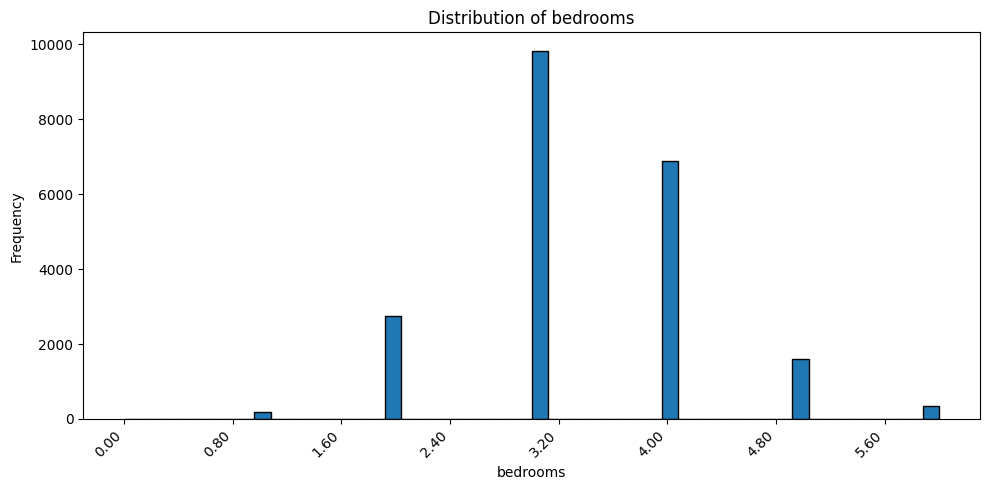

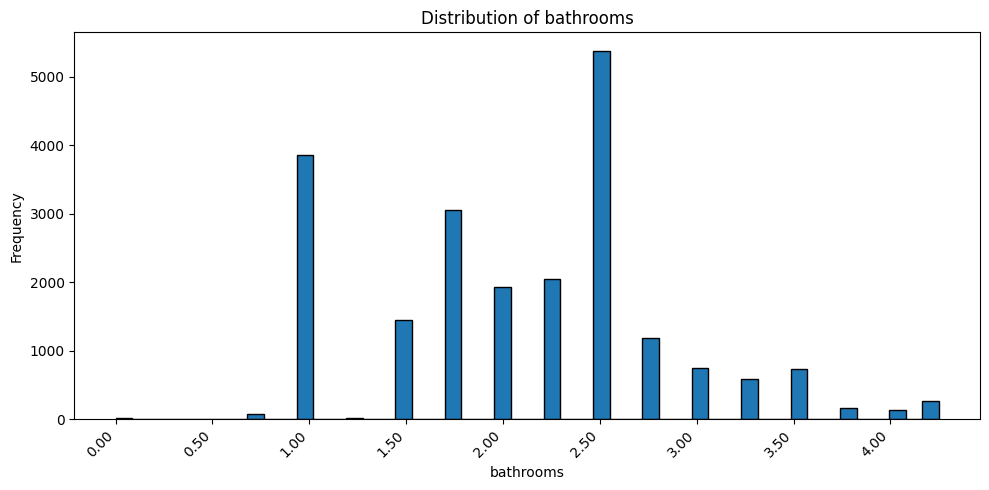

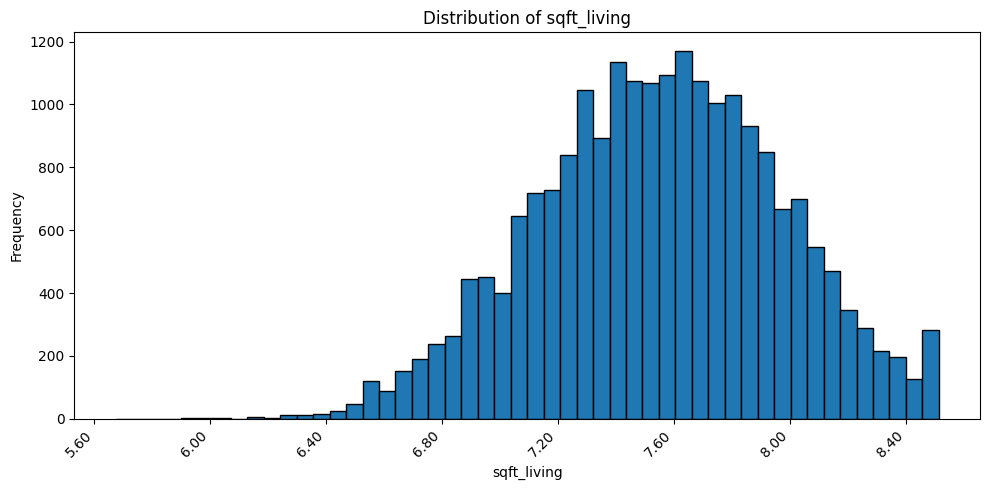

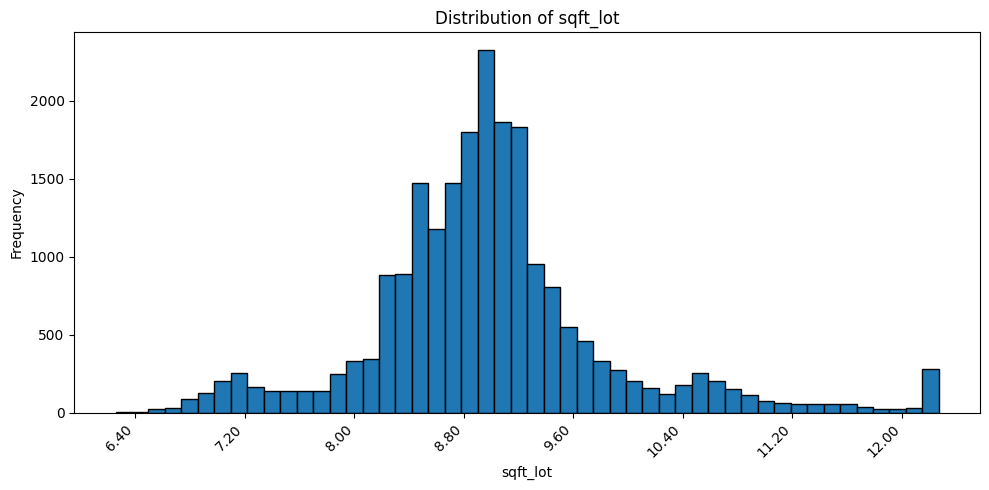

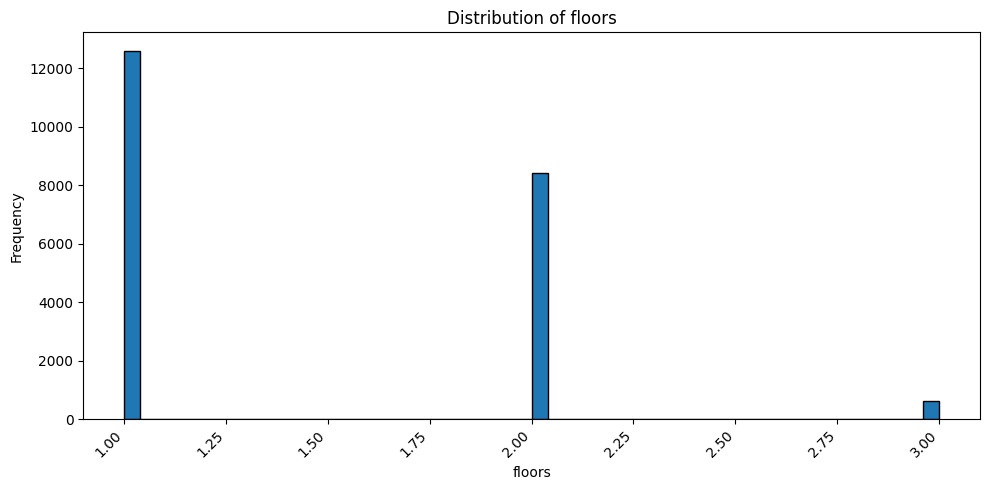

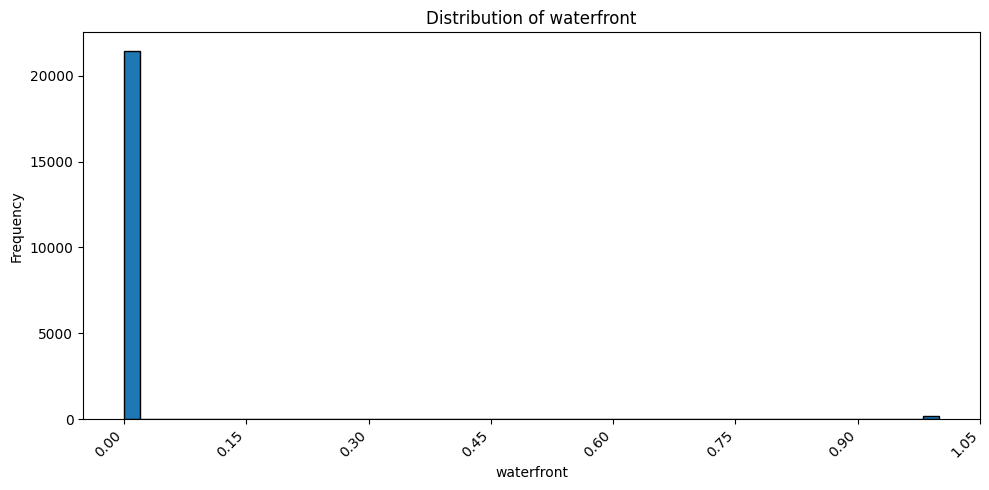

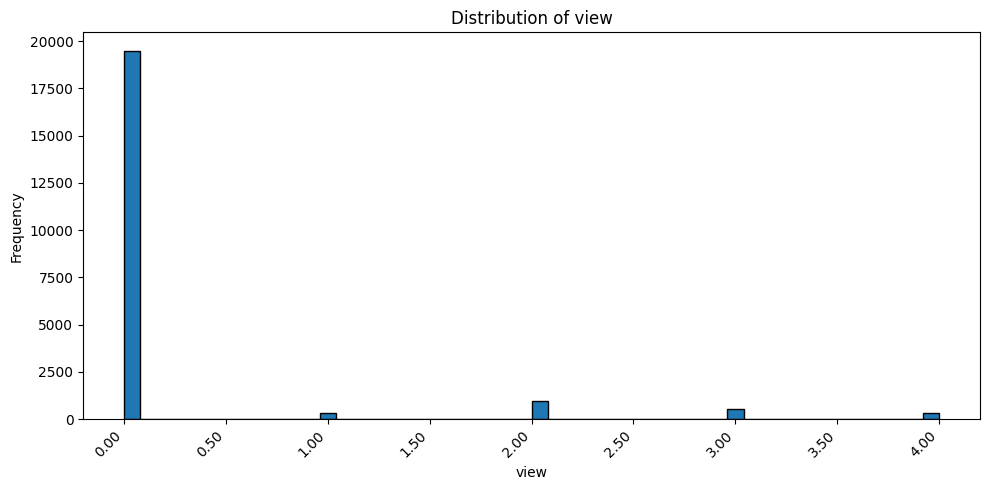

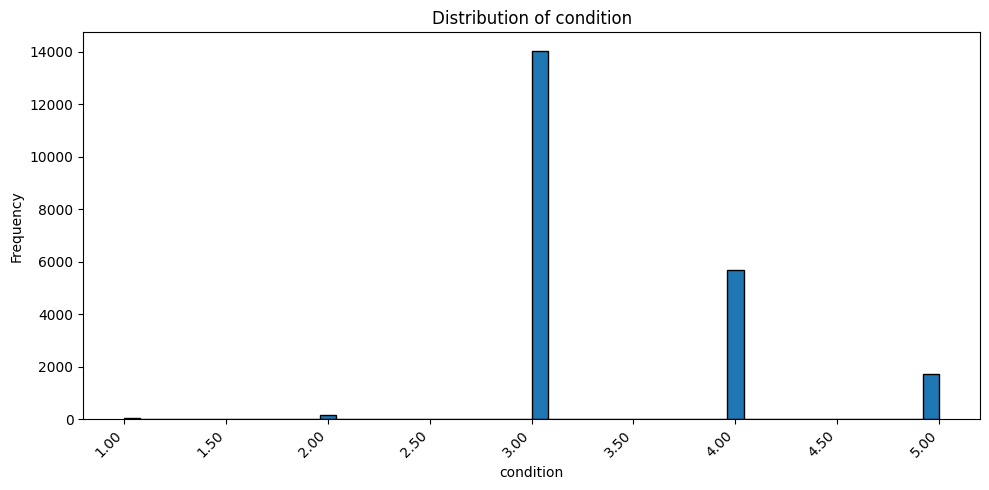

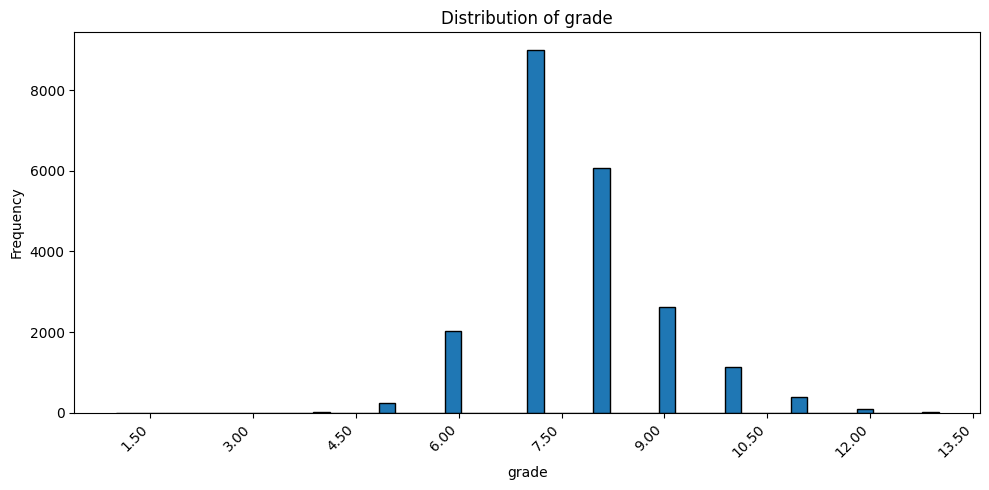

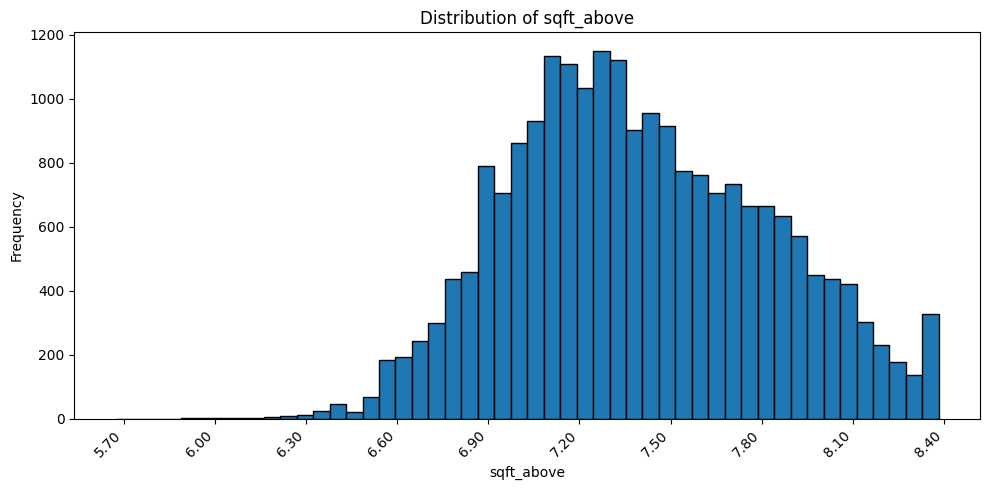

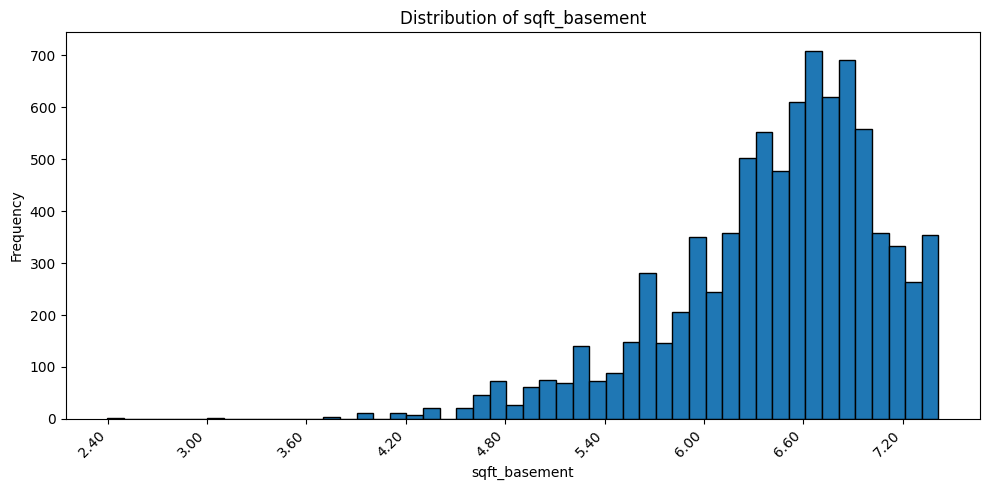

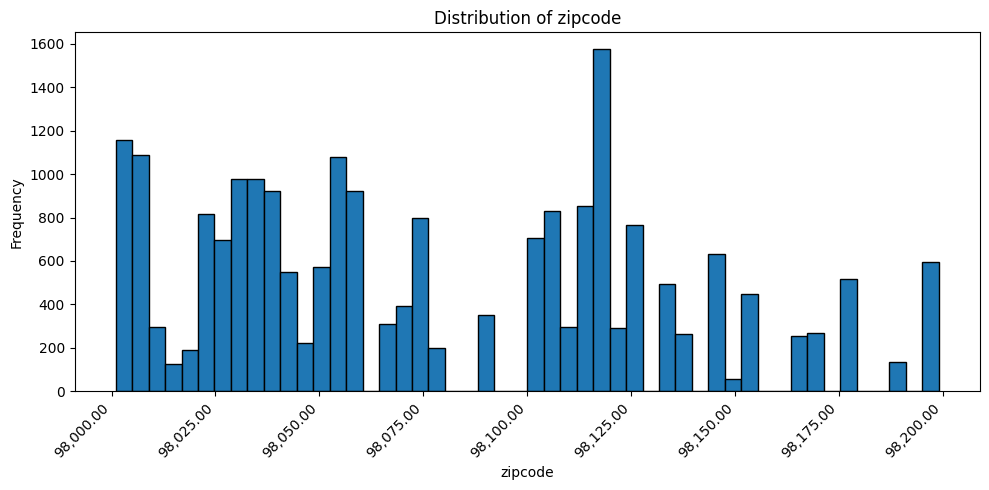

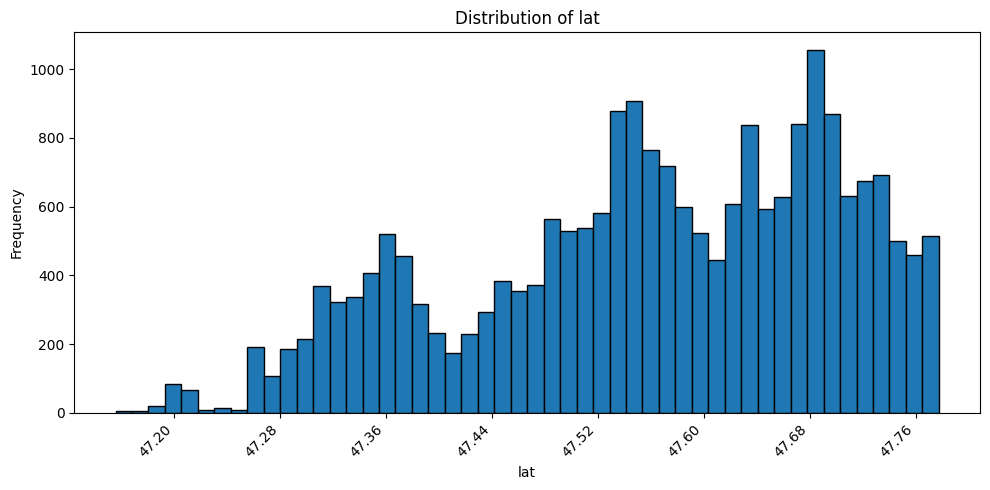

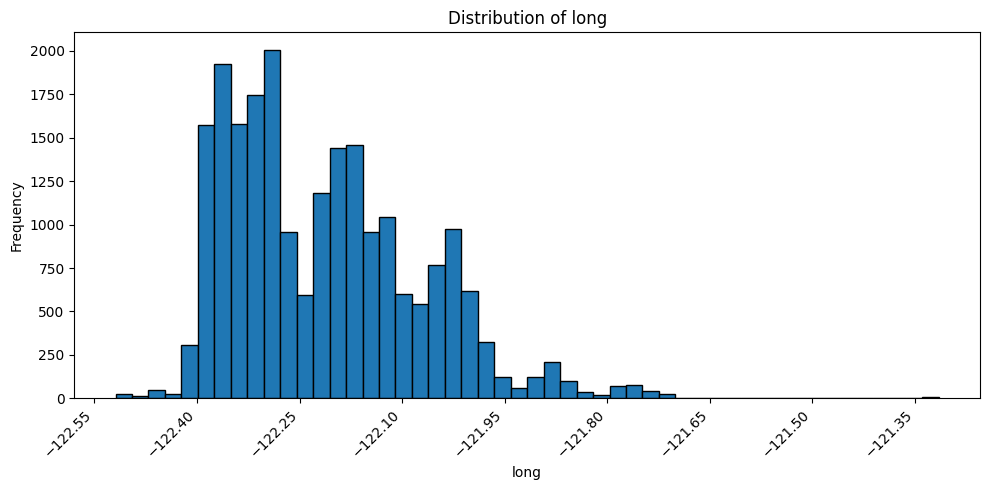

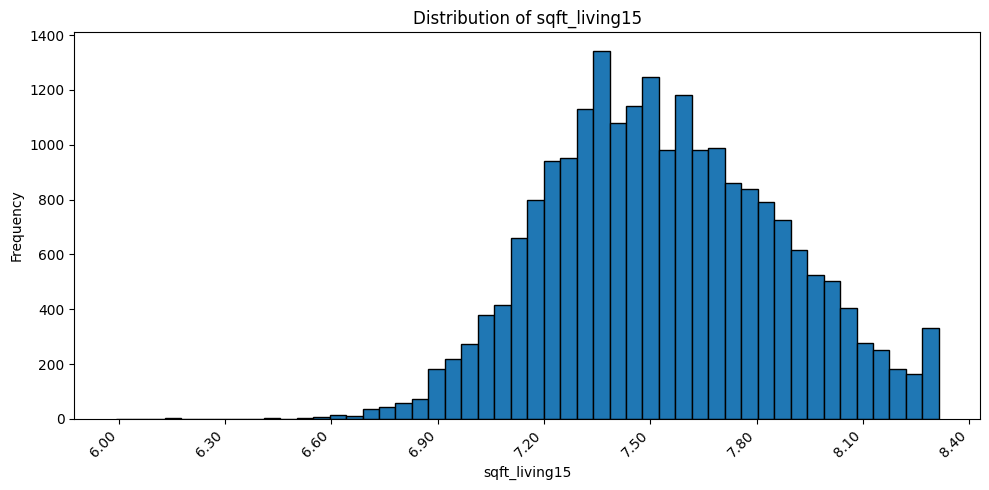

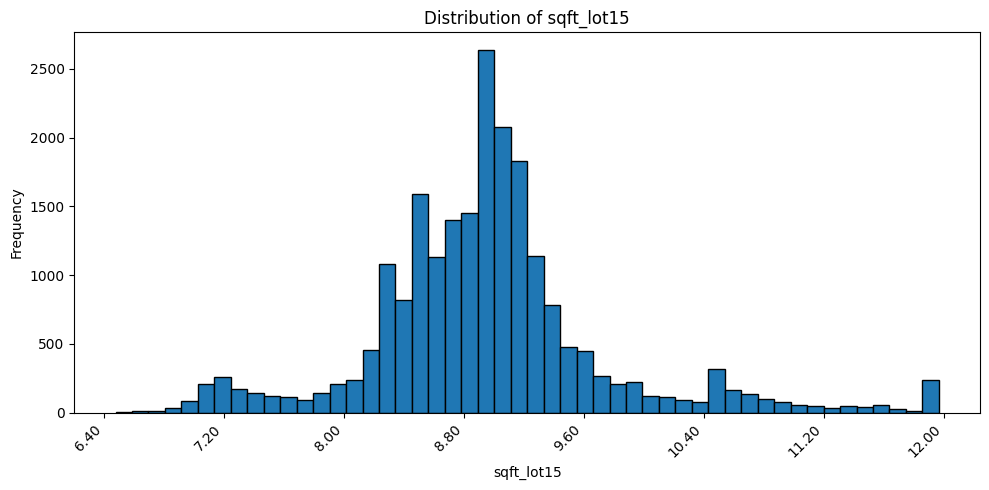

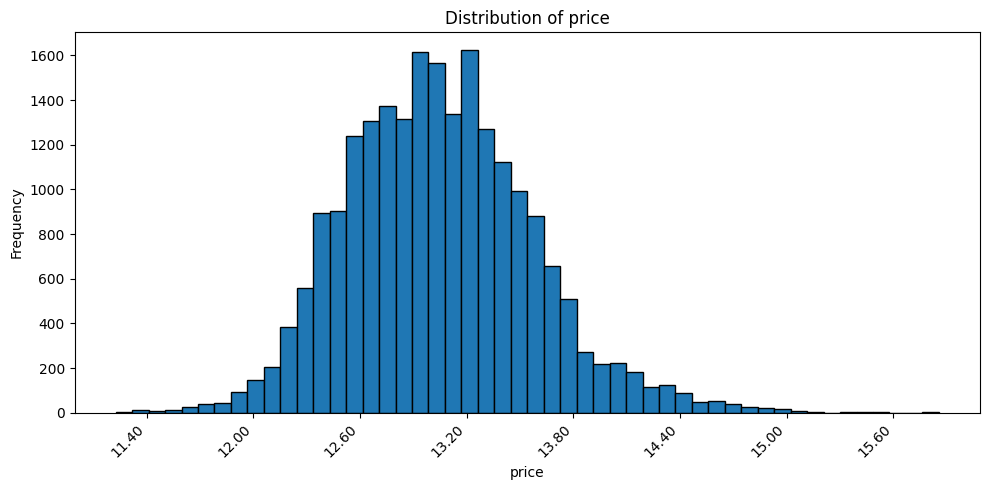

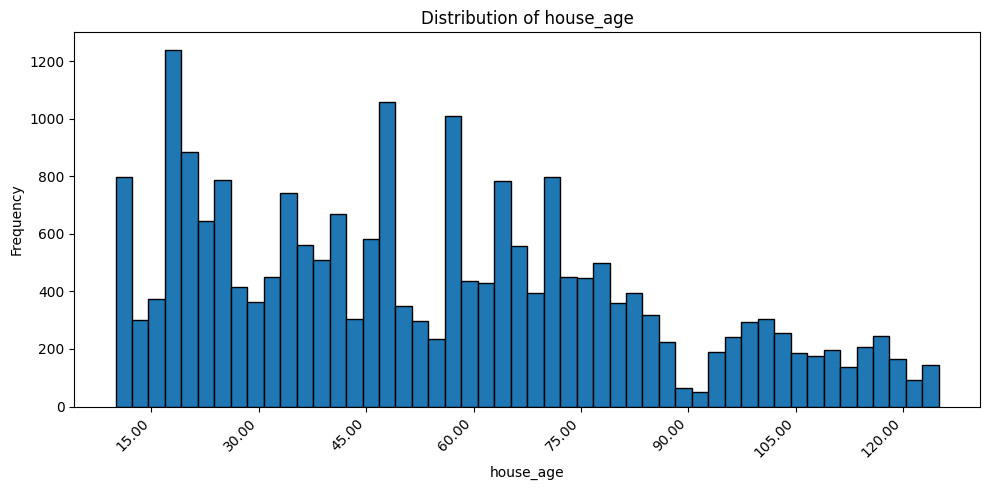

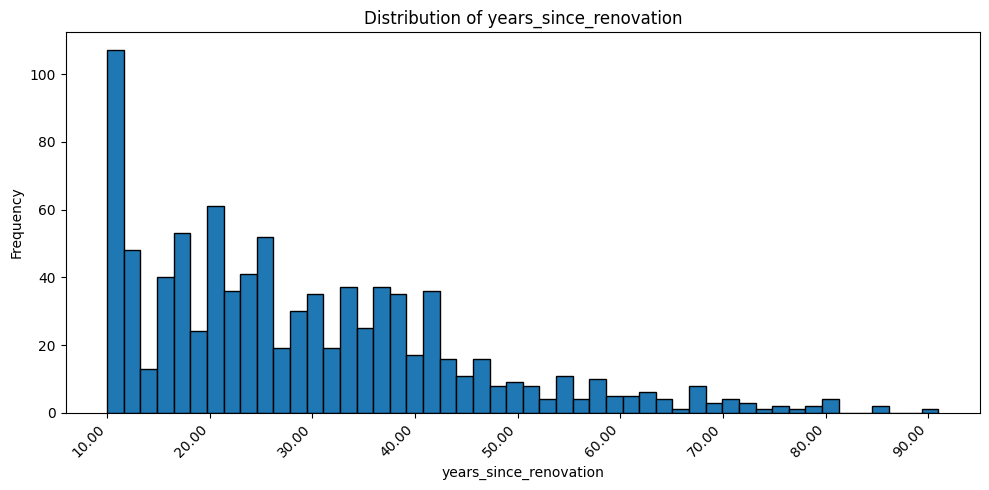

In [58]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from pyspark.sql.types import NumericType

numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]

df_pandas = df.select(numeric_cols).toPandas()

for column in numeric_cols:
    plt.figure(figsize=(10, 5))

    plt.hist(df_pandas[column], bins=50, edgecolor='black')

    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()


## Multicollinearity

In [59]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType) and field.name != "price"]

df_pandas = df.select(numeric_cols).toPandas()

df_pandas = df_pandas.dropna()

X = sm.add_constant(df_pandas)
vif_scores = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_scores = vif_scores[vif_scores["Variable"] != "const"]

print(vif_scores)


                  Variable        VIF
1                 bedrooms   1.493879
2                bathrooms   2.376580
3              sqft_living  44.383175
4                 sqft_lot   5.779807
5                   floors   1.895949
6               waterfront   1.467318
7                     view   1.904452
8                condition   1.304073
9                    grade   2.827467
10              sqft_above  35.726492
11           sqft_basement   7.837224
12                 zipcode   2.001825
13                     lat   1.382941
14                    long   2.429246
15           sqft_living15   2.395798
16              sqft_lot15   5.809883
17               house_age   1.391459
18  years_since_renovation   1.559302


Need to address high VIF sqft_living and sqft_above

In [60]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType) and field.name != "price" and field.name != "sqft_above"]

df_pandas = df.select(numeric_cols).toPandas()

df_pandas = df_pandas.dropna()

X = sm.add_constant(df_pandas)
vif_scores = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

vif_scores = vif_scores[vif_scores["Variable"] != "const"]

print(vif_scores)


                  Variable       VIF
1                 bedrooms  1.493149
2                bathrooms  2.370858
3              sqft_living  4.257555
4                 sqft_lot  5.764796
5                   floors  1.802998
6               waterfront  1.463827
7                     view  1.897362
8                condition  1.301174
9                    grade  2.644789
10           sqft_basement  1.795035
11                 zipcode  2.000287
12                     lat  1.382078
13                    long  2.420938
14           sqft_living15  2.382789
15              sqft_lot15  5.808214
16               house_age  1.380438
17  years_since_renovation  1.544849


all VIF scores acceptable

In [61]:
df = df.drop("sqft_above")

In [62]:
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- date: date (nullable = true)
 |-- bedrooms: double (nullable = true)
 |-- bathrooms: double (nullable = true)
 |-- sqft_living: double (nullable = true)
 |-- sqft_lot: double (nullable = true)
 |-- floors: integer (nullable = true)
 |-- waterfront: integer (nullable = false)
 |-- view: integer (nullable = true)
 |-- condition: integer (nullable = true)
 |-- grade: integer (nullable = true)
 |-- sqft_basement: double (nullable = true)
 |-- zipcode: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- sqft_living15: double (nullable = true)
 |-- sqft_lot15: double (nullable = true)
 |-- price: double (nullable = true)
 |-- house_age: integer (nullable = true)
 |-- years_since_renovation: integer (nullable = true)



## Correlations with `Price`

In [63]:
from pyspark.sql.functions import corr, abs, col

numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType) and field.name != "price"]

corr_expressions = [corr("price", col_name).alias(col_name) for col_name in numeric_cols]

corr_df = df.select(*corr_expressions)

corr_melted = (
    corr_df.selectExpr(f"stack({len(numeric_cols)}, " +
                       ", ".join([f"'{col_name}', {col_name}" for col_name in numeric_cols]) + ") as (feature, correlation)")
)

corr_sorted = corr_melted.orderBy(abs(col("correlation")).desc())

corr_sorted.show(truncate=False)


+----------------------+--------------------+
|feature               |correlation         |
+----------------------+--------------------+
|grade                 |0.7036342159387883  |
|sqft_living           |0.6703126137278054  |
|sqft_living15         |0.60516393600741    |
|bathrooms             |0.5472495992321685  |
|lat                   |0.4491739916801171  |
|bedrooms              |0.3533759753812073  |
|view                  |0.34652209946609425 |
|sqft_basement         |0.31958600214051985 |
|floors                |0.2859823887422301  |
|years_since_renovation|-0.195835664465062  |
|waterfront            |0.17458640393326347 |
|sqft_lot              |0.1372971136882618  |
|sqft_lot15            |0.12334295861116192 |
|house_age             |-0.08065448328603929|
|long                  |0.04994217510189046 |
|condition             |0.039557501271115576|
|zipcode               |-0.03830595432859351|
+----------------------+--------------------+



## Entire Correlation Matrix

In [ ]:
from pyspark.sql.functions import corr

numeric_cols = [field.name for field in df.schema.fields if isinstance(field.dataType, NumericType)]

corr_values = []
for col1 in numeric_cols:
    row = []
    for col2 in numeric_cols:
        row.append(df.select(corr(col1, col2)).collect()[0][0])
    corr_values.append(row)

corr_matrix = pd.DataFrame(corr_values, index=numeric_cols, columns=numeric_cols)

import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


## Write Final CSV

In [ ]:
df.printSchema()

In [ ]:
df.coalesce(1).write.mode("overwrite").option("header", "true").csv("/content/drive/MyDrive/HousingPriceRegression/data/kc_house_data_final")

import os
import shutil

output_folder = "/content/drive/MyDrive/HousingPriceRegression/data/kc_house_data_final"
output_file = "/content/drive/MyDrive/HousingPriceRegression/data/kc_house_data_final.csv"

part_file = [f for f in os.listdir(output_folder) if f.startswith("part-")][0]

shutil.move(os.path.join(output_folder, part_file), output_file)

shutil.rmtree(output_folder)

